In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Right now, simulations were only done using the numpy.random implementation of Mersenne Twister.

# First order selection probabilities

In [39]:
FO = read.csv('firstOrderSummary.csv', header = TRUE)
FO %>% select(Algorithm, Pop.size, Sample.size, seed, reps, Chi.squared, Df, P.value, Range, Range.P.value) %>%
arrange(Range.P.value) %>% head(15)

Algorithm,Pop.size,Sample.size,seed,reps,Chi.squared,Df,P.value,Range,Range.P.value
PIKK,13,4,233424280,1000000,19.97340,12,0.06759087,3026,0.00749277
PIKK,30,4,100,5000000,31.72037,29,0.33228036,4574,0.02339654
sample_by_index,30,4,429496729,100000,35.83310,29,0.17847737,603,0.06033657
Random_Sample,30,4,100,500000,38.49835,29,0.11164859,1344,0.06275601
PIKK,13,4,233424280,10000000,14.70169,12,0.25815720,7994,0.06581760
Algorithm_R,30,4,233424280,5000000,38.31676,29,0.11545241,4202,0.07187205
Algorithm_R,30,4,429496729,1000000,41.10041,29,0.06748847,1873,0.07469249
sample_by_index,30,4,429496729,500000,33.38338,29,0.26254649,1301,0.09137724
PIKK,13,4,233424280,5000000,12.62674,12,0.39674399,5315,0.11356366
Algorithm_R,13,4,429496729,10000000,14.61013,12,0.26345256,7388,0.13024853


In [40]:
FO %>% filter(Algorithm == "PIKK") %>% 
select(Pop.size, Sample.size, seed, reps, Chi.squared, Df, P.value, Range, Range.P.value) %>%
arrange(seed, Pop.size, Sample.size, reps) %>% head(15)

Pop.size,Sample.size,seed,reps,Chi.squared,Df,P.value,Range,Range.P.value
13,4,100,100000,7.884380,12,0.7940992,556,0.56050509
13,4,100,500000,7.098232,12,0.8510542,955,0.88627413
13,4,100,1000000,8.524018,12,0.7429576,1750,0.56830781
13,4,100,5000000,7.409866,12,0.8293829,3003,0.89031199
13,4,100,10000000,6.815486,12,0.8695622,4409,0.86126762
13,10,100,100000,2.212378,12,0.9990042,399,0.99854924
13,10,100,500000,2.724725,12,0.9971951,1139,0.98633844
13,10,100,1000000,2.421807,12,0.9984305,1291,0.99818730
13,10,100,5000000,2.954866,12,0.9958544,3649,0.98474603
13,10,100,10000000,3.604493,12,0.9895634,5938,0.95338063


# Unique sample selection probabilities

In [41]:
US = read.csv('uniqueSampleSummary.csv', header = TRUE)
US %>% select(Algorithm, Pop.size, Sample.size, seed, reps, Chi.squared, Df, P.value, Range, Range.P.value) %>%
arrange(Range.P.value) %>% head(20)


Algorithm,Pop.size,Sample.size,seed,reps,Chi.squared,Df,P.value,Range,Range.P.value
PIKK,13,4,100,500000,717.6975,714,0.454098610,205,0.007688790
PIKK,13,4,100,100000,730.7301,714,0.323863245,91,0.009453177
FYKD,30,4,233424280,10000000,27339.4905,27404,0.607542285,178,0.010270184
PIKK,13,4,429496729,10000000,708.6343,714,0.549616862,886,0.019163899
sample_by_index,13,4,100,1000000,806.1363,714,0.009186372,279,0.021311090
Random_Sample,13,4,100,10000000,736.8222,714,0.269205011,871,0.029216620
PIKK,13,10,429496729,10000000,288.7823,285,0.426370062,1281,0.031844928
FYKD,13,4,233424280,10000000,727.0374,714,0.359219468,856,0.043810450
Algorithm_R,30,4,100,1000000,27790.4880,27404,0.049879720,54,0.046463600
PIKK,13,10,429496729,500000,299.8000,285,0.261965865,280,0.050356064


# Sample  selection frequencies

In [11]:
US %>% select(Algorithm, Pop.size, Sample.size, seed, reps, Max.Prob, Min.Prob, Max.Selection.Prob.Ratio) %>%
arrange(desc(Max.Selection.Prob.Ratio))

Algorithm,Pop.size,Sample.size,seed,reps,Max.Prob,Min.Prob,Max.Selection.Prob.Ratio
sample_by_index,30,4,429496729,500000,7.6e-05,2e-06,38.00000
Algorithm_R,30,4,429496729,500000,8.0e-05,4e-06,20.00000
PIKK,30,4,233424280,500000,7.8e-05,4e-06,19.50000
Random_Sample,30,4,100,500000,7.6e-05,4e-06,19.00000
Random_Sample,30,4,100,100000,1.7e-04,1e-05,17.00000
Random_Sample,30,4,233424280,100000,1.6e-04,1e-05,16.00000
FYKD,30,4,429496729,100000,1.5e-04,1e-05,15.00000
sample_by_index,30,4,429496729,100000,1.5e-04,1e-05,15.00000
Algorithm_R,30,4,233424280,100000,1.4e-04,1e-05,14.00000
FYKD,30,4,233424280,100000,1.4e-04,1e-05,14.00000


# Plots

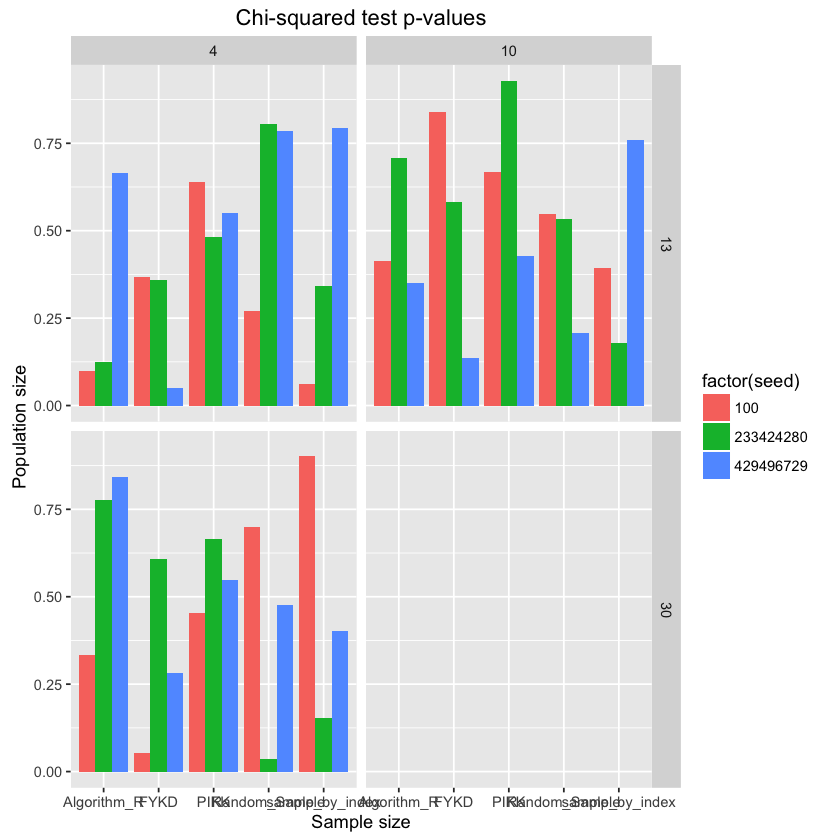

In [13]:
US %>% filter(reps == 10000000) %>% 
ggplot(aes(x = Algorithm, y = P.value, fill = factor(seed))) + 
    geom_bar(stat = "identity", position = "dodge") + 
    facet_grid(Pop.size~Sample.size) + 
    labs(x = "Sample size", y = "Population size", title = "Chi-squared test p-values")


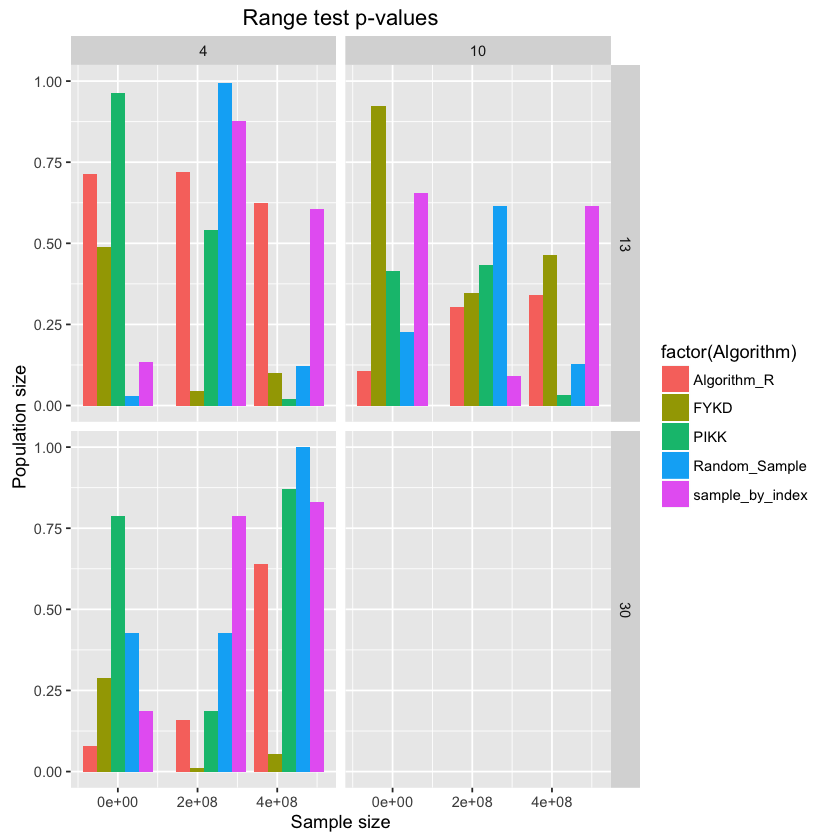

In [15]:
US %>% filter(reps == 10000000) %>% 
ggplot(aes(x = seed, y = Range.P.value, fill = factor(Algorithm))) + 
    geom_bar(stat = "identity", position = "dodge") + 
    facet_grid(Pop.size~Sample.size) + 
    labs(x = "Sample size", y = "Population size", title = "Range test p-values")



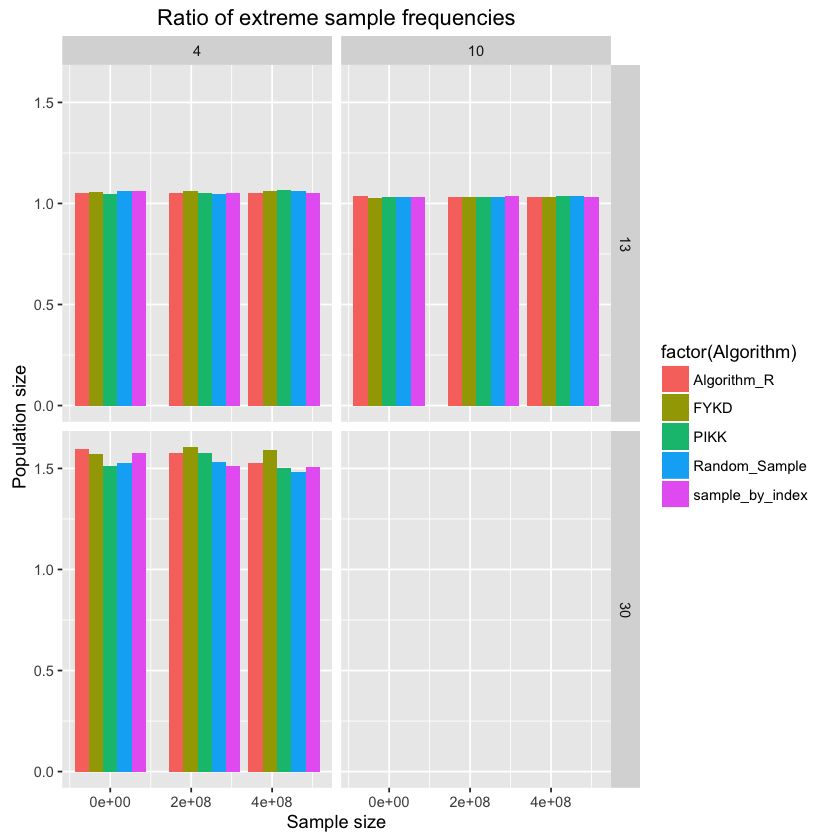

In [16]:
US %>% filter(reps == 10000000) %>% 
ggplot(aes(x = seed, y = Max.Selection.Prob.Ratio, fill = factor(Algorithm))) + 
    geom_bar(stat = "identity", position = "dodge") + 
    facet_grid(Pop.size~Sample.size) + 
    labs(x = "Sample size", y = "Population size", title = "Ratio of extreme sample frequencies")



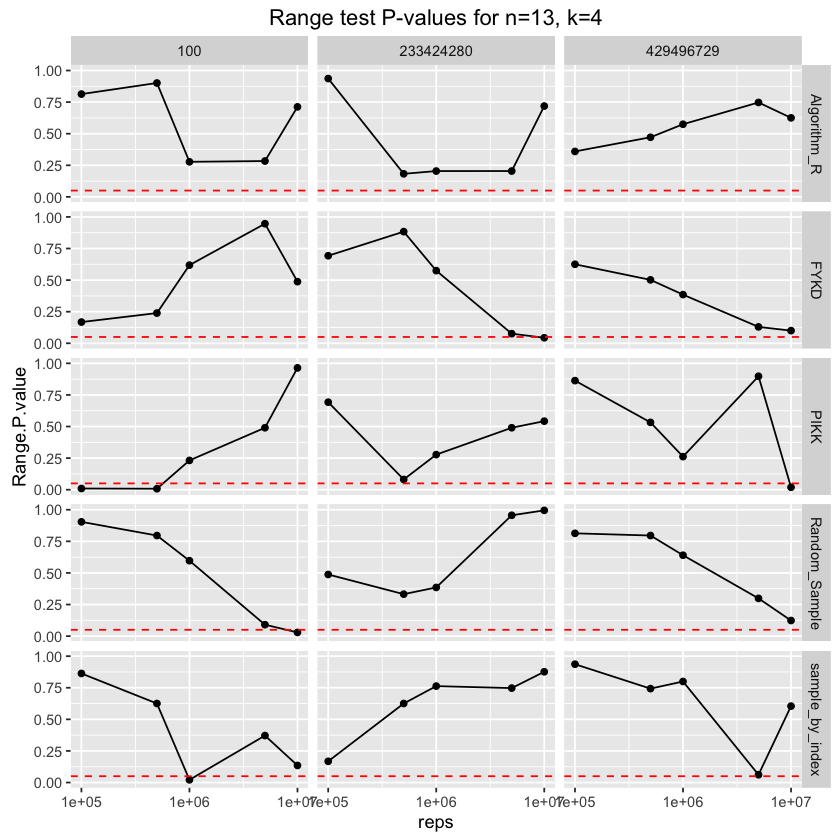

In [36]:
US %>% filter(Pop.size == 13, Sample.size == 4) %>%
ggplot(aes(x = reps, y = Range.P.value)) + 
    geom_line() + geom_point() +
    facet_grid(Algorithm~seed) +
    scale_x_log10() +
    geom_hline(yintercept = 0.05, col = "red", linetype = "dashed") +
    ggtitle("Range test P-values for n=13, k=4")

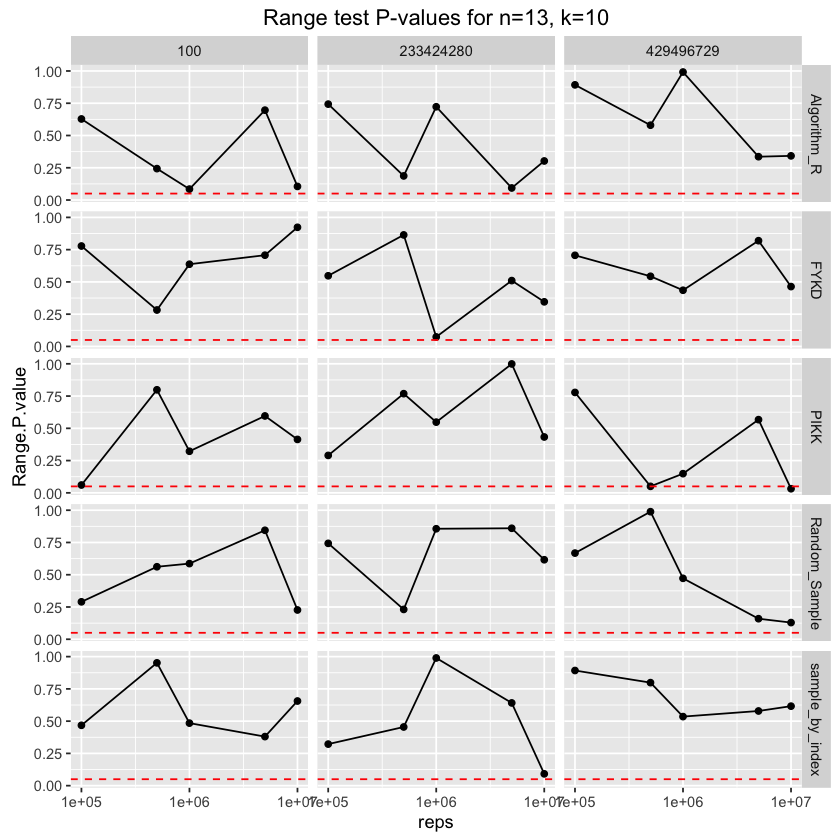

In [34]:
US %>% filter(Pop.size == 13, Sample.size == 10) %>%
ggplot(aes(x = reps, y = Range.P.value)) + 
    geom_line() + geom_point() +
    facet_grid(Algorithm~seed) +
    scale_x_log10() +
    geom_hline(yintercept = 0.05, col = "red", linetype = "dashed") +
    ggtitle("Range test P-values for n=13, k=10")

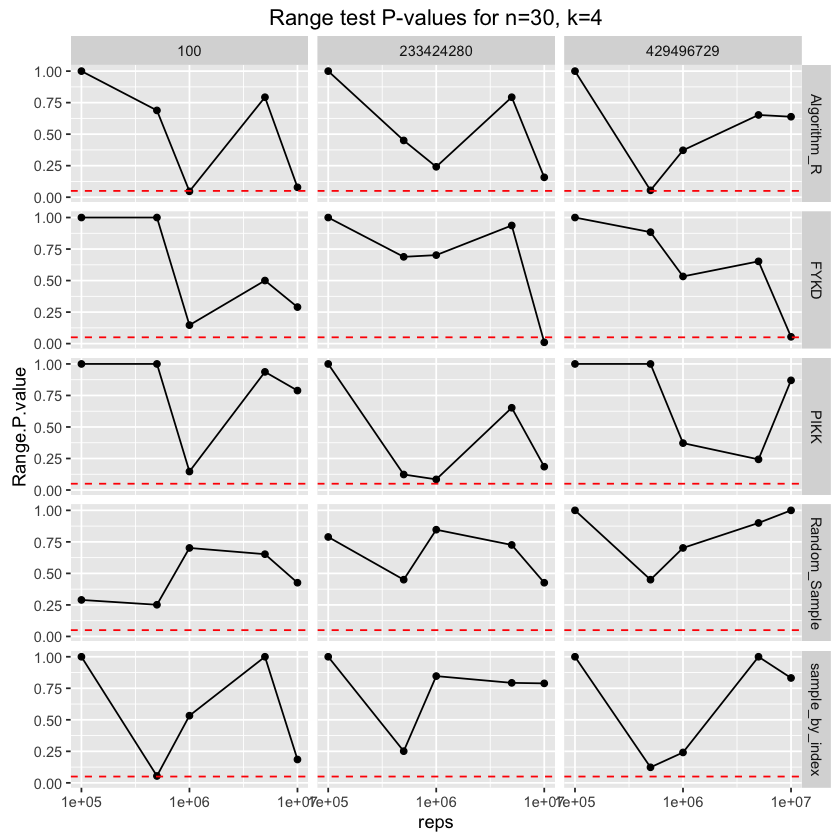

In [35]:
US %>% filter(Pop.size == 30, Sample.size == 4) %>%
ggplot(aes(x = reps, y = Range.P.value)) + 
    geom_line() + geom_point() +
    facet_grid(Algorithm~seed) +
    scale_x_log10() +
    geom_hline(yintercept = 0.05, col = "red", linetype = "dashed") +
    ggtitle("Range test P-values for n=30, k=4")

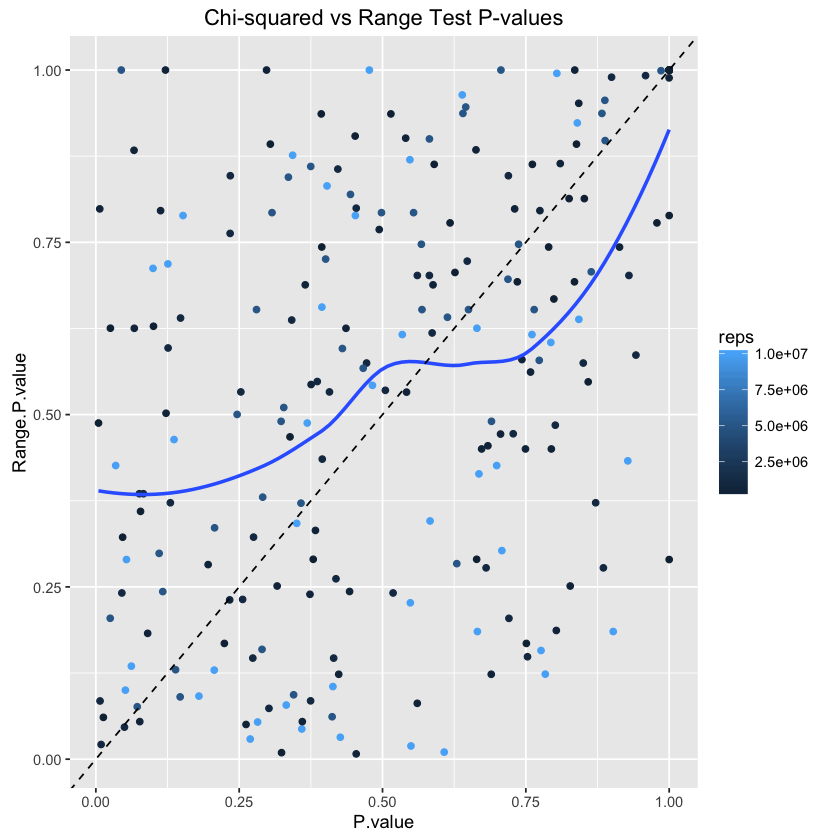

In [51]:
US %>% ggplot(aes(x = P.value, y = Range.P.value, color = reps)) + 
    geom_point() + 
    geom_smooth(se = FALSE) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
    ggtitle("Chi-squared vs Range Test P-values")